In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
data = pd.read_csv("online_shoppers_intention.csv")

In [4]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Checking for null

In [6]:
# checking for null
data.isna().sum().sum()  # pure data

0

# checking for duplicates 

In [7]:
# checking for duplicates
duplicated_rows = data.duplicated()

In [8]:
data[(data.duplicated() == True) & ("Revenue" == True)]
# here i have found that all duplicated rows are from Revenue = False, we can delete them


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


In [9]:
data = data.drop_duplicates() # I have drop the duplicates rows, which all have Revenue = False, 

In [10]:
data["Revenue"].value_counts()

Revenue
False    10297
True      1908
Name: count, dtype: int64

#  Feature Engineering and EDA

In [11]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [12]:
# Converting bool value into integer
data["Weekend"].value_counts()

Weekend
False    9346
True     2859
Name: count, dtype: int64

In [13]:
data["Weekend"] = data["Weekend"].replace({False:0,True:1})

<ipython-input-13-1337b2b974dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Weekend"] = data["Weekend"].replace({False:0,True:1})


In [14]:
data["Revenue"] = np.where(data["Revenue"] == False,0,1)

<ipython-input-14-468e25d439f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Revenue"] = np.where(data["Revenue"] == False,0,1)


In [15]:
y = data["Revenue"]

In [16]:
data.drop(["Revenue"],axis =1, inplace = True)

<ipython-input-16-55de82b1c8f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["Revenue"],axis =1, inplace = True)


In [17]:
# Few columns are highly correlated so following are working on them

In [18]:
data["Administrative_per_duration"] = data["Administrative"]/(data["Administrative_Duration"] + 0.00001)

<ipython-input-18-b97a17eaa9af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Administrative_per_duration"] = data["Administrative"]/(data["Administrative_Duration"] + 0.00001)


In [19]:
data["Informational_per_duration"] = data["Informational"]/(data["Informational_Duration"] + 0.00001)

<ipython-input-19-ddaf7fb8b8d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Informational_per_duration"] = data["Informational"]/(data["Informational_Duration"] + 0.00001)


In [20]:
data['ProductRel_per_dur'] = data['ProductRelated']/(data['ProductRelated_Duration']+0.00001)

<ipython-input-20-038e35b6c8fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ProductRel_per_dur'] = data['ProductRelated']/(data['ProductRelated_Duration']+0.00001)


In [21]:
num = data.select_dtypes(np.number)
cat = data.select_dtypes(include = "object")

In [22]:
# looking the relationship of each numerical features with target

In [23]:
num.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Administrative_per_duration', 'Informational_per_duration',
       'ProductRel_per_dur'],
      dtype='object')

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


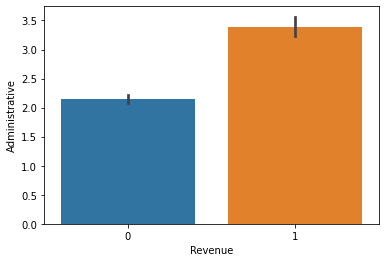

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


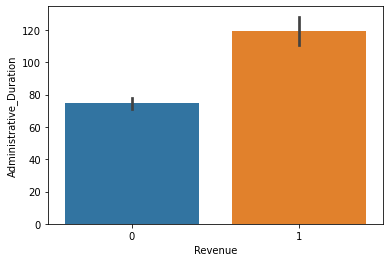

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


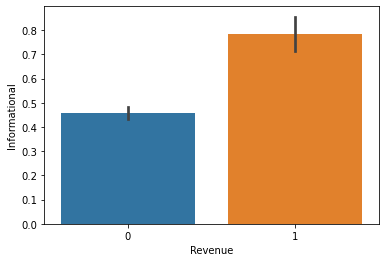

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


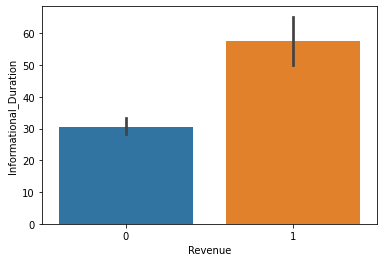

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


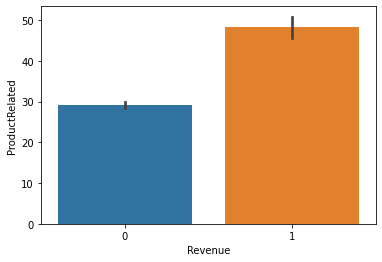

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


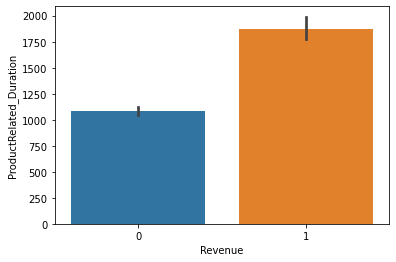

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


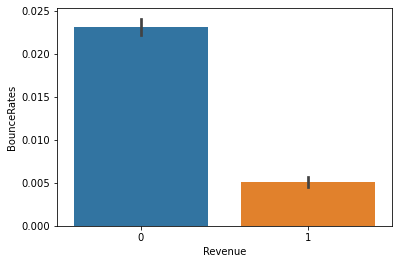

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


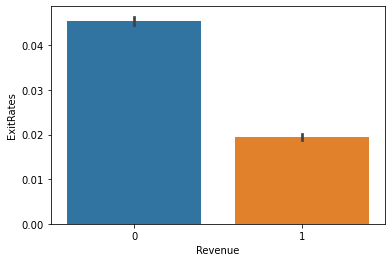

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


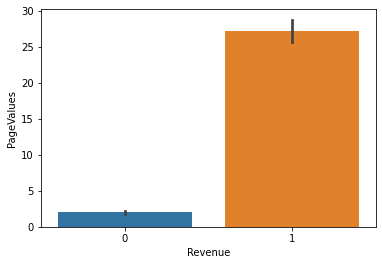

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


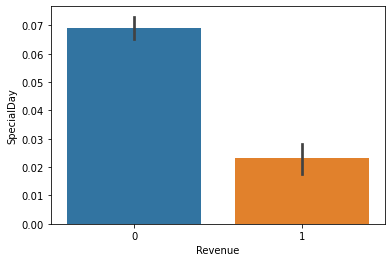

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


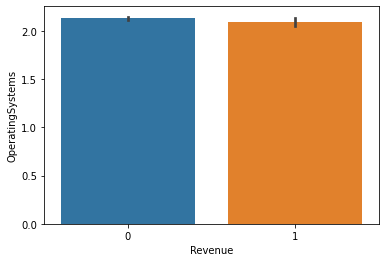

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


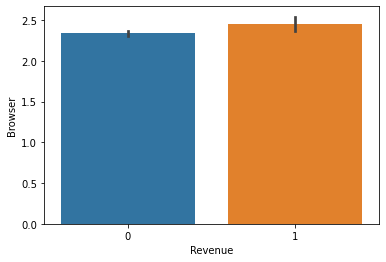

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


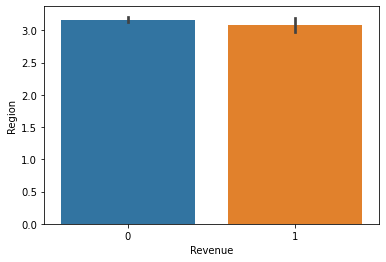

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


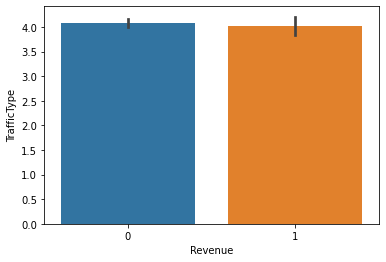

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


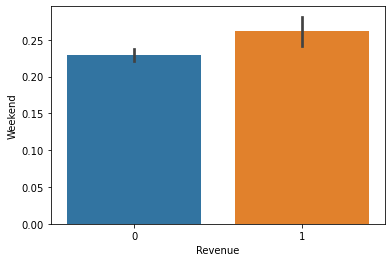

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


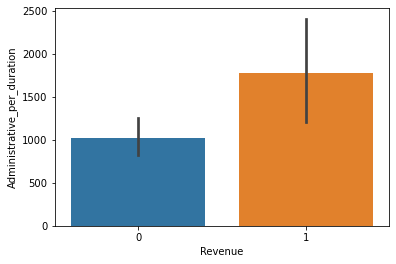

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


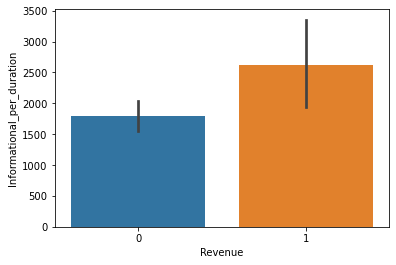

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


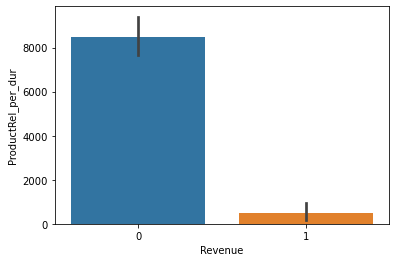

In [24]:
for i in num.columns:
    sns.barplot(y,num[i])
    plt.show()

In [25]:
# browser, operaing system,region,traffic type i find not effective features

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


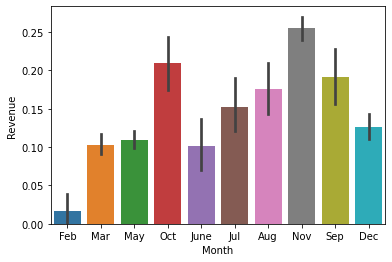

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


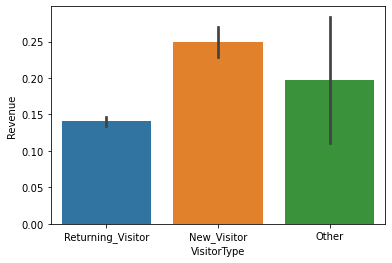

In [26]:
for i1 in cat.columns:
    sns.barplot(cat[i1],y)
    plt.show()

In [27]:
# both the visitor type and month are informative features 
# i would like to cross verify it with feature selection method

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


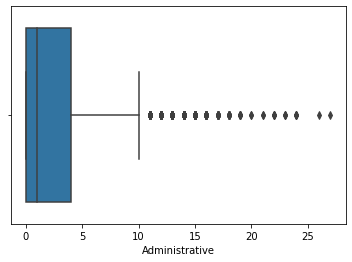

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


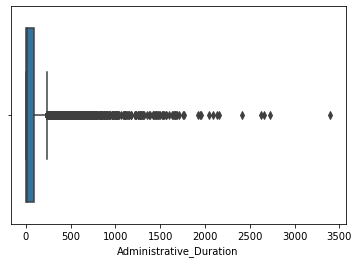

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


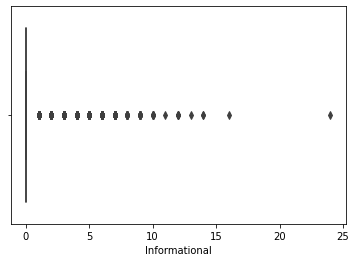

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


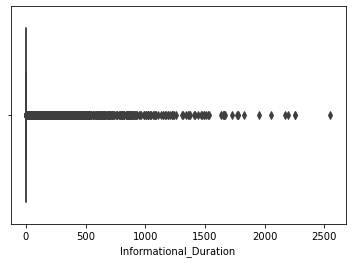

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


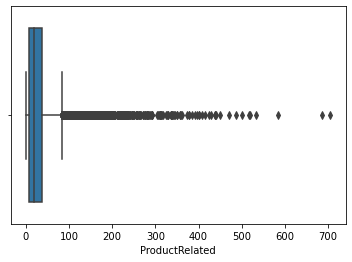

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


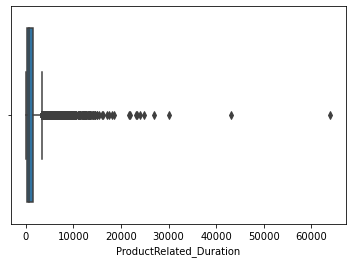

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


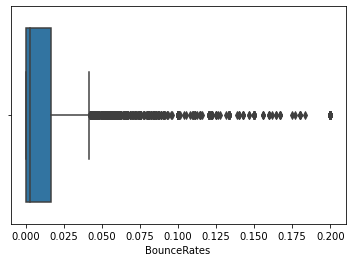

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


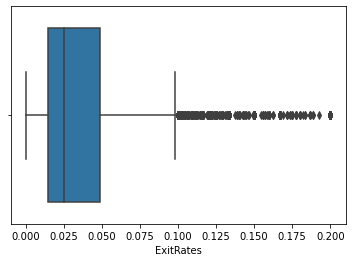

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


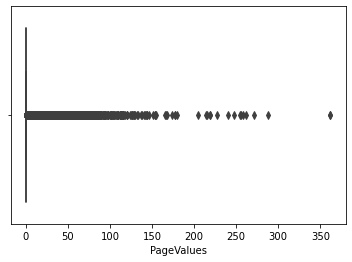

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


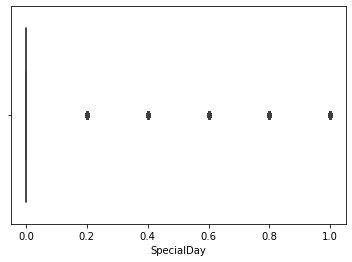

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


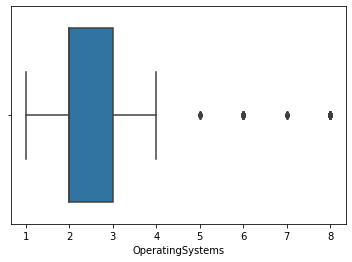

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


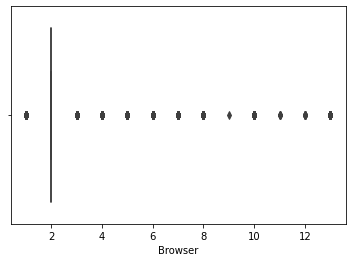

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


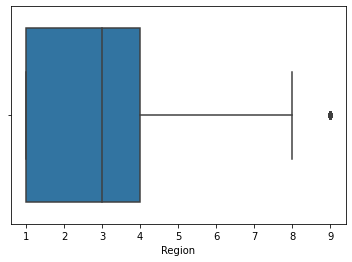

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


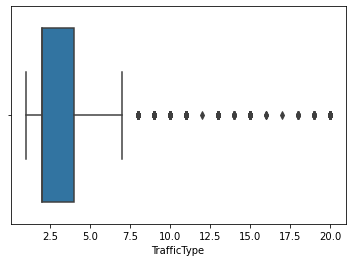

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


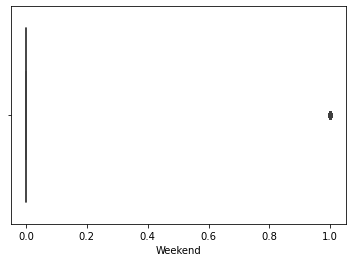

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


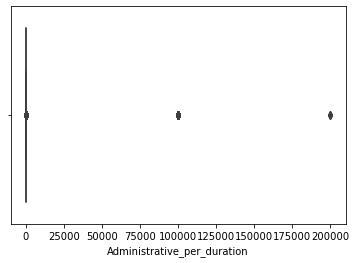

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


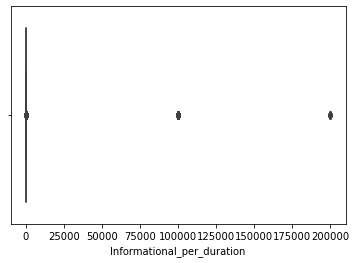

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


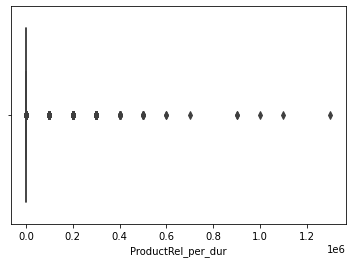

In [28]:
# outliers treatment
for i in num.columns:
    sns.boxplot(num[i])
    plt.show()


In [29]:
#All numerical data are right skew which shows the effect of outliers

In [30]:
def cap_floor (x):
    x = x.clip(lower = x.quantile(0.02))
    x = x.clip(upper = x.quantile(0.85))
    return x

In [31]:
# treating outliers
num.describe(percentiles = [0.85])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Administrative_per_duration,Informational_per_duration,ProductRel_per_dur
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,1.220500e+04
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904,0.234248,1138.908882,1925.451623,7.226589e+03
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654,0.423545,10915.818384,14268.896638,4.142517e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.010610,0.000000,3.414084e-02
85%,6.000000,164.360000,1.000000,26.500000,57.000000,2223.593333,0.031579,0.068254,9.562841,0.000000,3.000000,3.000000,6.000000,8.000000,1.000000,0.068965,0.017048,7.608798e-02
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,200000.000000,200000.000000,1.300000e+06


In [32]:
#  1: 'Search Engine',
#     2: 'Social Media',
#     3: 'Referral',
#     4: 'Direct',
#     5: 'Email',
#     6: 'Paid Advertising',
#     7: 'Affiliate',
#     8: 'Display',
#     9: 'Video',
#     10: 'Organic Search',
#     11: 'Display Advertising',
#     12: 'Mobile',
#     13: 'Unknown',
#     14: 'Content Marketing',
#     15: 'Social',
#     16: 'Other',
#     17: 'Press Release',
#     18: 'Podcast',
#     19: 'Webinar',
#     20: 'Guest Blogging'

In [33]:
# converting Region and TrafficType into category because both of them have very few unique vlaues

In [34]:
data["Region"] = data["Region"].astype("object")
data["TrafficType"] = data["TrafficType"].astype("object")

<ipython-input-34-a5c9d0cc95ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Region"] = data["Region"].astype("object")
<ipython-input-34-a5c9d0cc95ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["TrafficType"] = data["TrafficType"].astype("object")


In [35]:
data_num = data.select_dtypes(include = np.number)
data_cat = data.select_dtypes(include = "object")

In [36]:
# keeping only product related and product related duration and removing Administrative,Administrative_Duration, Informational, Informational_Durati
data_num.drop(["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated",'ProductRelated_Duration',"OperatingSystems",'Browser'],axis =1,inplace =True)

In [37]:
data_num.columns

Index(['BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Administrative_per_duration', 'Informational_per_duration',
       'ProductRel_per_dur'],
      dtype='object')

In [38]:
# processing on categorical data

In [39]:
data_cat["TrafficType"] = np.where(~data_cat["TrafficType"].isin(["2","1","3","4"]),"0",data_cat["TrafficType"])

In [40]:
data_cat["Region"] = np.where(data_cat["Region"].isin(["9", "8", "5"]), "other", data_cat["Region"])

In [41]:
# converting it into 0 and 1 -- if special day is there or not
#data_num["SpecialDay"] = np.where (data_num["SpecialDay"].isin([0.6,0.8,0.4,0.2,1.0]),1,0)

In [42]:
data_num.columns

Index(['BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Administrative_per_duration', 'Informational_per_duration',
       'ProductRel_per_dur'],
      dtype='object')

In [43]:
data_cat.columns

Index(['Month', 'Region', 'TrafficType', 'VisitorType'], dtype='object')

In [44]:
# Outlier treatment

In [45]:
cols_outlier = ["BounceRates","ExitRates", "Administrative_per_duration","Informational_per_duration","ProductRel_per_dur"]
data_num[cols_outlier] = data_num[cols_outlier].apply(cap_floor)

In [46]:
# sclaing numerical columns 

# from sklearn.preprocessing import StandardScaler

# transformer = StandardScaler().fit(num)
# X_train_scale = pd.DataFrame(transformer.transform(num),columns = num.columns)
# #X_test_scale = pd.DataFrame(transformer.transform(test_num),columns = test_num.columns)

In [47]:
#here for just getting best features using min max scaler becoz SS is giving negative values which are not compitable to SelectKbest

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = pd.DataFrame(scaler.fit_transform(data_num),columns = data_num.columns)

                         Specs       Score
2                   PageValues  477.378598
1                    ExitRates  179.752418
0                  BounceRates  176.659323
6   Informational_per_duration   88.530346
5  Administrative_per_duration   83.388262
7           ProductRel_per_dur   61.099569
3                   SpecialDay   54.897443
4                      Weekend    7.185979


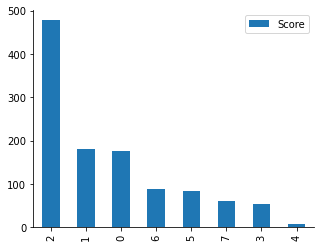

In [49]:
# feaure selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(numerical_scaled,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(numerical_scaled.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(12,'Score'))
ax = featureScores.nlargest(10,'Score').plot(kind='bar')
plt.subplots_adjust(left=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Analysis without considering Imbalance

In [50]:
X = pd.concat([data_num,data_cat],axis =1)

In [51]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

In [52]:
#Split further into train_num and train_cat. Also test_num and test_cat
train_cat = X_train.select_dtypes(include = "object")
train_num = X_train.select_dtypes(exclude = "object")
test_cat = X_test.select_dtypes(include = "object")
test_num = X_test.select_dtypes(exclude = "object")

In [53]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(train_num)
X_train_scale = pd.DataFrame(transformer.transform(train_num),columns = train_num.columns)
X_test_scale = pd.DataFrame(transformer.transform(test_num),columns = test_num.columns)

In [54]:
# Encode the categorical features using One-Hot Encoding

# One hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(train_cat)

cols = encoder.get_feature_names_out(input_features=train_cat.columns)

#X_train_one_hot = encoder.transform(train_cat).toarray()
X_train_one_hot = pd.DataFrame(encoder.transform(train_cat).toarray(),columns=cols)
X_test_one_hot= pd.DataFrame(encoder.transform(test_cat).toarray(),columns=cols)

In [55]:
#re-concatenate train_num and train_cat as X_train as well as test_num and test_cat as X_test
X_train_r = pd.concat((X_train_scale,X_train_one_hot),axis=1)
X_test_r = pd.concat((X_test_scale,X_test_one_hot),axis=1)

In [56]:
# Fit a logistic regression (classification) model on the training data.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [57]:
model = LogisticRegression()
model.fit(X_train_r, y_train)
y_pred = model.predict(X_test_r)

In [58]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.8820155673904138


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1990,   42],
       [ 246,  163]], dtype=int64)

In [60]:
score = model.score(X_test_r, y_test)
print("Test Accuracy Score", score)

Test Accuracy Score 0.8820155673904138


In [61]:
score = model.score(X_train_r, y_train)
print("Train Accuracy Score", score)

Train Accuracy Score 0.8840639082343302


In [62]:
cm = confusion_matrix(y_test, y_pred)

# Define labels for rows and columns
labels = ['Actual 0', 'Actual 1']
columns = ['Predicted 0', 'Predicted 1']

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(cm, index=labels, columns=columns)

# Print the confusion matrix
print(confusion_df)

          Predicted 0  Predicted 1
Actual 0         1990           42
Actual 1          246          163


In [63]:
# as it is imbalance data set it is predicting class 0 with good accuracy but nor class 1

In [64]:
# Compute precision

from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7951219512195122
Recall: 0.39853300733496333


In [65]:
# we can see that recall value is very low . our ulmtimate aim is to get good recall value, which we will adress with upsmaling or downsampling


In [66]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=3)
from sklearn.ensemble import RandomForestClassifier
model4 =   RandomForestClassifier(max_depth=2, random_state=0)
from sklearn.model_selection import cross_val_score
 

In [67]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model_pipeline = [model1, model2, model3,model4]
model_names = ['DecisionTreeClassifier', 'LogisticRegression', 'KNeighborsClassifier', "RandomForestClassifier"]
scores = {}

for model, model_name in zip(model_pipeline, model_names):
    print(model_name)
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    scores_res = cross_validate(model, X_train_scale, y_train, cv=5, scoring=scoring)
    scores[model_name] = scores_res
    print(f"Accuracy: {scores[model_name]['test_accuracy'].mean()}")
    print(f"Precision: {scores[model_name]['test_precision'].mean()}")
    print(f"Recall: {scores[model_name]['test_recall'].mean()}")
    print(f"F1-score: {scores[model_name]['test_f1'].mean()}")

DecisionTreeClassifier
Accuracy: 0.8585618594344137
Precision: 0.5389245933485733
Recall: 0.5476945373467113
F1-score: 0.5430100890473585
LogisticRegression
Accuracy: 0.8822203440692336
Precision: 0.7471562545625006
Recall: 0.35289186176142695
F1-score: 0.4790538995440067
KNeighborsClassifier
Accuracy: 0.8791481474486499
Precision: 0.6413493629133515
Recall: 0.4863076923076924
F1-score: 0.552642996840874
RandomForestClassifier


C:\Users\Denish\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Denish\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Denish\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Denish\AppData\Roaming\Python\Python38\site-packages

Accuracy: 0.8464768892750119
Precision: 0.0
Recall: 0.0
F1-score: 0.0


C:\Users\Denish\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Treatment of imbalance data with SMOTE 

In [68]:
#pip install imbalanced-learn

In [69]:
y_train.reset_index(drop = True,inplace = True)

In [70]:
#pip install threadpoolctl==3.1.0

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_r, y_train)



In [73]:
X_train_resampled

,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Administrative_per_duration,Informational_per_duration,ProductRel_per_dur,Month_Dec,Month_Feb,...,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.782047,-0.949546,-0.319638,-0.308907,-0.553056,1.694129,2.188606,-0.709446,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1,-0.782047,-0.723676,3.525145,-0.308907,-0.553056,1.694129,-0.495174,0.164192,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.0
2,-0.782047,-1.352886,2.472057,-0.308907,-0.553056,1.254935,-0.495174,-0.631638,0.0,0.0,...,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,-0.254980,0.029010,-0.319638,-0.308907,-0.553056,-0.867838,-0.495174,-1.130058,1.0,0.0,...,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.0
4,-0.782047,-1.352886,-0.319638,-0.308907,-0.553056,-0.867838,-0.495174,0.387582,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16525,-0.782047,-0.763523,-0.319638,-0.308907,-0.553056,1.694129,-0.495174,-0.865650,0.0,0.0,...,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
16526,-0.782047,-0.892492,0.389375,-0.308907,-0.553056,-0.593707,-0.495174,0.691459,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.322918,0.0,0.677082,0.0,0.0
16527,-0.782047,-0.692876,-0.012519,-0.308907,-0.553056,0.039362,-0.495174,-1.220503,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.524018,0.000000,0.0,0.000000,0.0,0.0
16528,-0.782047,-1.343981,2.653774,-0.308907,-0.553056,-0.867838,-0.495174,1.099603,0.0,0.0,...,0.000000,0.006227,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.0


In [74]:
y_train_resampled.value_counts()

Revenue
0    8265
1    8265
Name: count, dtype: int64

In [75]:
y_train.value_counts()

Revenue
0    8265
1    1499
Name: count, dtype: int64

In [76]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=2, random_state=0)
RF.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=2, random_state=0)

In [77]:
y_pred_RF = RF.predict(X_test_r)

In [78]:

from sklearn.metrics import precision_score, recall_score

accuracy = metrics.accuracy_score(y_test, y_pred_RF)
print("Accuracy: ",accuracy)


precision = precision_score(y_test, y_pred_RF)
recall = recall_score(y_test, y_pred_RF)
print("Precision:", precision)
print("Recall:", recall)


cm = confusion_matrix(y_test, y_pred_RF)
# Define labels for rows and columns
labels = ['Actual 0', 'Actual 1']
columns = ['Predicted 0', 'Predicted 1']

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(cm, index=labels, columns=columns)

# Print the confusion matrix
print(confusion_df)

Accuracy:  0.8701351904956984
Precision: 0.5804195804195804
Recall: 0.8117359413202934
          Predicted 0  Predicted 1
Actual 0         1792          240
Actual 1           77          332


In [79]:
# Get feature importances
feature_importances = RF.feature_importances_
feature_names = X_train_resampled.columns
feature_imp_list = list(zip(feature_names, feature_importances))
# for feature_name, importance in zip(feature_names, feature_importances):
#     print(f"{feature_name}: {importance}")

In [80]:
feature_imp_list.sort(key = lambda x: x[1],reverse = True) 

In [81]:
feature_imp_list

[('PageValues', 0.3484788249631804),
 ('ExitRates', 0.17939257690009128),
 ('Administrative_per_duration', 0.14154526825118602),
 ('BounceRates', 0.0808956752363697),
 ('ProductRel_per_dur', 0.0778428588499358),
 ('Month_Nov', 0.07289951651910452),
 ('VisitorType_Returning_Visitor', 0.02347833862955337),
 ('Informational_per_duration', 0.01791949385520918),
 ('Month_May', 0.014822686636712832),
 ('SpecialDay', 0.01155953163290398),
 ('Month_Mar', 0.008541088320307009),
 ('Region_7', 0.0054804082297318325),
 ('Region_4', 0.004617102820139238),
 ('Region_6', 0.0036376974064075986),
 ('Month_Dec', 0.0024342338455360184),
 ('Month_Sep', 0.0020098261969603345),
 ('Region_8', 0.0018045950871703475),
 ('Month_Oct', 0.0007289383678444859),
 ('Month_Feb', 0.0006370231507874162),
 ('Region_2', 0.00047748012101496076),
 ('Month_Jul', 0.0004729024761127055),
 ('Region_9', 0.0002644336622577568),
 ('Region_3', 3.493119177570821e-05),
 ('Weekend', 2.456764970756643e-05),
 ('Month_June', 0.0),
 ('Reg

In [82]:
def choose_model(model, X_train, X_test, y_train, y_test):
    results = {}
    if model == "LogisticRegression":
        model1 = LogisticRegression()
        model1.fit(X_train, y_train)
        y_pred = model1.predict(X_test)
          
    elif model == "KNeighborsClassifier":
        KNN = KNeighborsClassifier(n_neighbors=3)
        KNN.fit(X_train, y_train)
        y_pred = KNN.predict(X_test)
                
    elif model == "DecisionTreeClassifier()":
        DT = DecisionTreeClassifier()
        DT.fit(X_train, y_train)
        y_pred = DT.predict(X_test)
        
         
    elif model == "RandomForestClassifier":
        RF =   RandomForestClassifier(max_depth=2, random_state=0)
        RF.fit(X_train, y_train)
        y_pred = RF.predict(X_test)
     
    
    accuracy = metrics.accuracy_score(y_test, y_pred_RF)
    precision = precision_score(y_test, y_pred_RF)
    recall = recall_score(y_test, y_pred_RF)
    print("Precision:", precision)
    print("Recall:", recall)
    cm = confusion_matrix(y_test, y_pred_RF)
    # Define labels for rows and columns
    labels = ['Actual 0', 'Actual 1']
    columns = ['Predicted 0', 'Predicted 1']
    # Create a DataFrame for the confusion matrix
    confusion_df = pd.DataFrame(cm, index=labels, columns=columns)
    results[model] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, "cm":confusion_df,'y_pred': y_pred}
    
    return results

# results = choose_model("Random Forest", X_train_scale, X_test_scale, y_train, y_test)
# for model, metrics in results.items():
#     print(f"Model: {model}")
#     print(f"R-squared (r2): {metrics['r2']}")
#     print(f"Root Mean Squared Error (RMSE): {metrics['rmse']}")
#     print(f"Predicted values (y_pred): {metrics['y_pred']}")
   


In [83]:
choose_model("LogisticRegression",X_train_resampled,X_test_r, y_train_resampled,y_test)

Precision: 0.5804195804195804
Recall: 0.8117359413202934


{'LogisticRegression': {'accuracy': 0.8701351904956984,
  'precision': 0.5804195804195804,
  'recall': 0.8117359413202934,
  'cm':           Predicted 0  Predicted 1
  Actual 0         1792          240
  Actual 1           77          332,
  'y_pred': array([1, 0, 0, ..., 0, 0, 1])}}